<a href="https://colab.research.google.com/github/khbae/data-analytics-process/blob/main/1_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5(Reinforcement_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 강화학습(Reinforcement Learning)

## [배경훈 (성균관대학교)](https://biz.skku.edu/bizskk/intro/faculty.do?mode=view&perId=LZStrK4YQ4gQgZgFgggGTAUQIwAYBSBHAngFhhgFliAjAcwF4qg%20&srProfessorType=20)



# 강화학습(Reinforcement Learning)

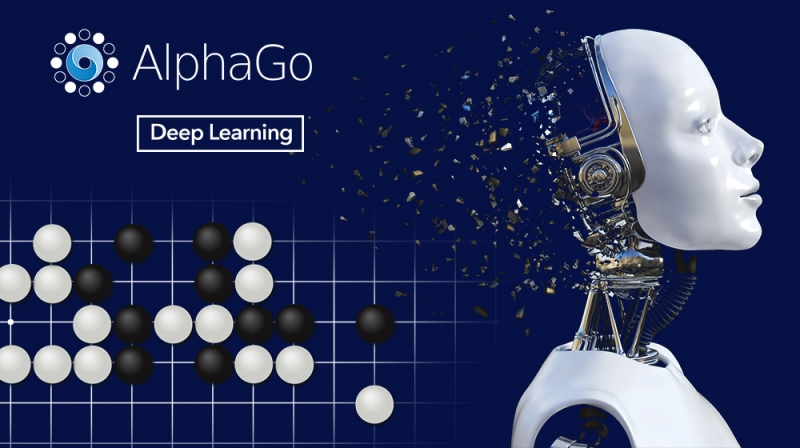


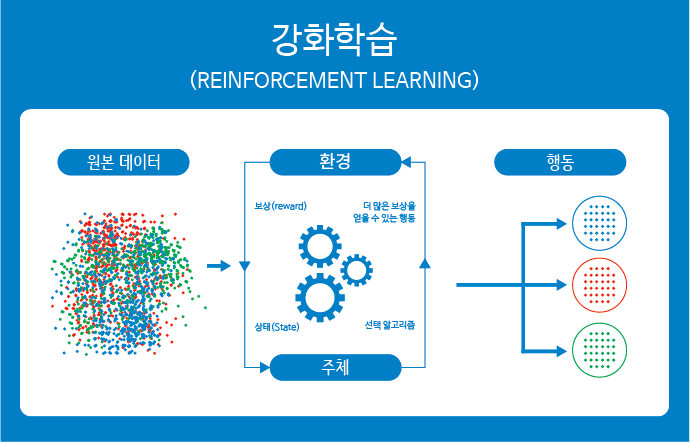

# 강화학습의 종류

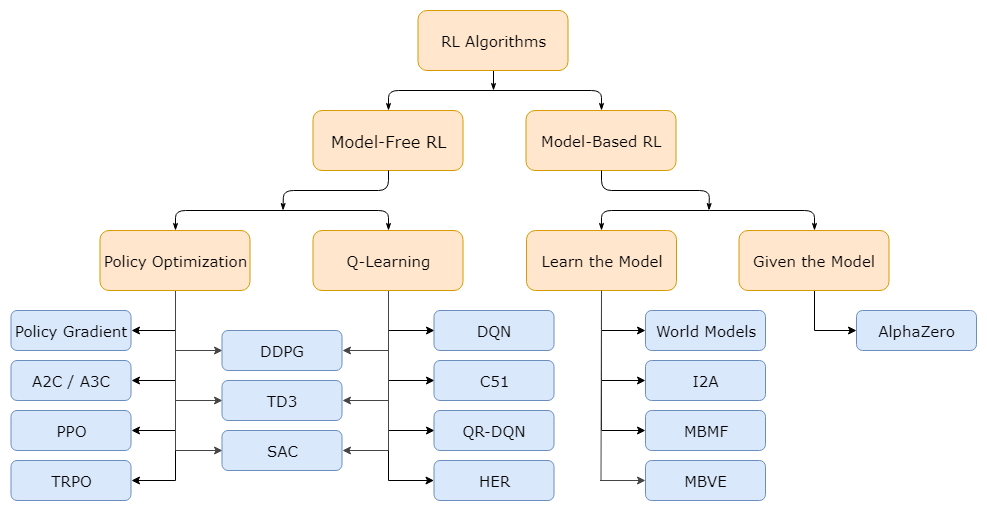

# 1. Q - Learning (https://en.wikipedia.org/wiki/Q-learning)

#### Q-Learning은 Model이 없이(Model-Free) 학습하는 강화학습 알고리즘

##### 1) Model-Based Algorithm : 환경에 대해 알고 있으며, 우리의 행동에 따른 환경의 변화를 아는 알고리즘
##### 예) 격자 공간 속의 로봇이 상하좌우로 이동을 할 때, 우리는 로봇의 다음 상태에 대해 직관적으로 파악할 수 있다.

##### 2) Model-Free Algorithm : 환경(Environment)에 대해 알지 못하고, 환경이 알려주는 다음 상태(State)와 다음 보상(Reward)을 '수동적으로' 얻게 된다. 
##### 예) 지뢰찾기를 한다고 할 때, 우리는 더 이상 환경에대해 모르므로 특정 네모칸을 클릭하면 환경이 주는 다음 상태와 다음 보상을 단순히 받는다.

##### >>> Model-Free Algorithm은 더 이상 환경이 어떻게 동작하는지 모르기 때문에 탐사(Exploration)를 해야한다. 이러한 탐사를 바탕으로 하는 Trail and Error를 통해 Policy Function을 점차 학습

##### 정책(Policy)이란 주어진 상태(State)에서 어떤 행동(Action)을 수행할지 나타내는 규칙

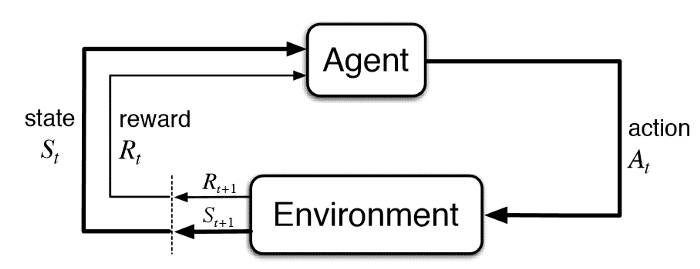

### Goal : 의사결정자가 특정 상황에서 특정 행동을 하라는 최적의 Policy를 배우는 것

##### 의사결정자(Agent)가 주어진 상태(State)에서 주어진 행동(Action)을 수행하는 것이 가져다 줄 효용(Reward)의 기대값을 예측하는 함수인 행동 가치 함수(Q 함수)를 학습함으로써 최적의 정책(Policy)을 학습
##### Q 러닝의 장점 중 하나는 주어진 환경의 모델 없이도 수행하는 행동의 기대값을 비교할 수 있다는 점
##### "Q"라는 단어는 현재 상태에서 취한 행동의 보상에 대한 quality

### 행동 가치 함수(Q value, Q 함수)

##### 어떤 상태 s에서 어떤 행동 a를 했을 때, 그 행동이 가지는 Value를 계산하는 함수
##### 이러한 행동 가치 함수는 Discounted Factor를 사용하여 특정 행동을 취했을 때, Episode가 종료되기까지 보상의 총합의 예측값을 계산
##### $\gamma$ 는 0에서 1 사이의 값을 갖는 Discount Factor로 현재 얻는 보상이 미래에 얻는 보상보다 얼마나 더 중요한지를 의미하는 값


$Q_{\pi}(s,a) = E_{\pi}[R_{t+1} + {\gamma}R_{t+2} + {\gamma}^2R_{t+3} +  ...|S_{t} = s, A_{t} = a] $

### Q-Learning Algorithm

##### 알고리즘이 시작되기 전에 Q 함수는 고정된 임의의 값을 갖는다. 
##### 각 시간 $t$에 에이전트는 어떠한 상태 $s_{t}$에서 행동 $a_{t}$를 취하고 새로운 상태 $s_{t+1}$로 전이한다. 이 때 보상 $r_{t}$가 얻어지며, Q 함수가 갱신된다. 
##### 알고리즘의 핵심은 다음과 같이 이전의 값과 새 정보의 가중합(weighted sum)을 이용하는 간단한 값 반복법(Value Iteration Update)이다.


$Q(s_{t},a_{t}) {\leftarrow} (1-{\alpha}) \cdot \underbrace{Q(s_{t},a_{t})}_{old \hspace{1mm} value} + \underbrace{{\alpha}}_{learning \hspace{1mm} rate} \cdot \overbrace{\Bigg(\underbrace{r_{t}}_{reward} + \underbrace{{\gamma}}_{discount \hspace{1mm} factor} \cdot \underbrace{\max_{a}Q(s_{t+1},a)}_{estimate \hspace{1mm} of \hspace{1mm} optimal \hspace{1mm} future \hspace{1mm} value}\Bigg)}^{learned \hspace{1mm} value}$


##### $\alpha$ 는 학습 속도 인자로, 0보다 크고 1보다 작거나 같은 값을 가진다.
도달한 상태 $s_{t+1}$이 종결 상태일 경우 알고리즘의 에피소드 하나가 끝난다. 

# 2. Q - Learning 예제 (Frozen Lake Game)

### State를 이동하여 H(Hall)에 빠지지 않고 G(Goal)로 이동하는 문제

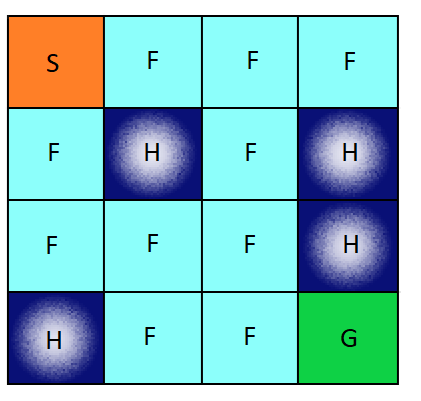

##### S : 시작점
##### G : 목표
##### F : 얼음길(agent가 서있을 수 있는 곳)
##### H : 구멍(agent가 도달하면 떨어지는 곳)

### 환경 세팅

In [1]:
## 필요한 패키지를 불러오기
import gym
import numpy as np   ## Q-table 저장하기 위해 사용하는 패키지
import pickle    ## Q-table을 "pkl" 파일로 저장하기 위해 사용하는 패키지
import time, os
from tqdm import tqdm

env = gym.make('FrozenLake-v0', is_slippery=False)  ## FrozenLake game을 로드
env.reset()   ## 게임의 환경을 디폴트나 초기 상태로 리셋할 수 있다.
env.render()  ## 게임의 GUI를 보기


SFFF
FHFH
FFFH
HFFG


In [2]:
env.step(1)

(4, 0.0, False, {'prob': 1.0})

In [3]:
env.render()

  (Down)
SFFF
FHFH
FFFH
HFFG


##### Agent의 가능한 4가지 움직임  : left(0), down(1), right(2), up(3)

##### 보상(reward) : F(얼음길) = 0 , H(구멍) = -1 , G(목표) = +1

##### 상태(States) : S, H, F, G 

#### >> 4x4=16 states & 4 actions

In [4]:
total_episodes = 10000 ## 에피소드의 총수

lr_rate = 1  ## 학습속도인자(the learning rate)
gamma = 0.99  ## 할인인자(the discount factor)

## Q-table의 초기값을 16x4 영행렬로 설정
Q = np.zeros((env.observation_space.n, env.action_space.n))  ## (게임에서 상태의 총수 , 행동의 총수)

In [5]:
## 랜덤하게 0에서 1 사이의 숫자를 생성
## 생성한 숫자가 epsilon보다 작으면, env.action_space.sample()에서 랜덤으로 행동을 한다 
## 생성한 숫자가 epsilon보다 크면, 그 상태에서, Q-table에서 최대 value를 가지는 행동을 한다.
epsilon = 0.5    ## the epsilon-greedy approach : epsilon이라는 hyper-parameter를 통해 행동 결정
def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action


## Q-Learning Algorithm을 이용하여 Q-table을 업데이트
def learn(state, state2, reward, action):
    predict = Q[state, action]
    target = reward + gamma * np.max(Q[state2, :])
    Q[state, action] = Q[state, action] + lr_rate * (target - predict)

$Q(s_{t},a_{t}) {\leftarrow} \underbrace{Q(s_{t},a_{t})}_{old \hspace{1mm} value} + \underbrace{{\alpha}}_{learning \hspace{1mm} rate} \cdot \overbrace{\Bigg(\underbrace{r_{t}}_{reward} + \underbrace{{\gamma}}_{discount \hspace{1mm} factor} \cdot \underbrace{\max_{a}Q(s_{t+1},a)}_{estimate \hspace{1mm} of \hspace{1mm} optimal \hspace{1mm} future \hspace{1mm} value}}^{learned \hspace{1mm} value} - \underbrace{Q(s_{t},a_{t})}_{old \hspace{1mm} value}\Bigg)$

In [6]:
# 에피소드를 작동하기 시작
for episode in tqdm(range(total_episodes)):

    ## env.reset()을 사용하여 초기 상태를 state에 저장
    state = env.reset()    
    done = False
    
    ## 아래에서 반환받은 done을 통해 에피소드가 끝났는지 체크
    while not done:
               
        ## 적절한 행동이 선택된다. (epsilon-greedy approach)
        action = choose_action(state)  

        ## 해당 action을 했을 때 environment가 변하고, 새로운 state2, reward, done 여부, info를 반환 받음
        state2, reward, done, info = env.step(action)  ## 선택된 행동이 환경 내에서 수행되고, 다음 상태(state2)와 보상(reward)이 반환, 에피소드가 끝났다면 done = true, info는 디버깅에 사용되는 추가 정보를 저장

        ## 위의 정보를 이용하여 함수 learn(state, state2, reward, action)을 통해 Q-table을 업데이트  
        learn(state, state2, reward, action)  ## Q-Learning Algorithm
        
        ## Q-table을 업데이트하고 난 후, 이전 상태였던 state를 현재 상태인 state2로 설정                        
        state = state2

print(Q)

## Q-table을 "frozenlake_qTable.pkl"이라는 이름의 파일로 저장
with open("frozenLake_qTable.pkl", 'wb') as f:
    pickle.dump(Q, f)

100%|██████████| 10000/10000 [00:04<00:00, 2287.70it/s]

[[0.94148015 0.95099005 0.95099005 0.94148015]
 [0.94148015 0.         0.96059601 0.95099005]
 [0.95099005 0.970299   0.95099005 0.96059601]
 [0.96059601 0.         0.95099005 0.95099005]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.96059601]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.970299  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


In [7]:
Q

array([[0.94148015, 0.95099005, 0.95099005, 0.94148015],
       [0.94148015, 0.        , 0.96059601, 0.95099005],
       [0.95099005, 0.970299  , 0.95099005, 0.96059601],
       [0.96059601, 0.        , 0.95099005, 0.95099005],
       [0.95099005, 0.96059601, 0.        , 0.94148015],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.        , 0.96059601],
       [0.        , 0.        , 0.        , 0.        ],
       [0.96059601, 0.        , 0.970299  , 0.95099005],
       [0.96059601, 0.9801    , 0.9801    , 0.        ],
       [0.970299  , 0.99      , 0.        , 0.970299  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9801    , 0.99      , 0.970299  ],
       [0.9801    , 0.99      , 1.        , 0.9801    ],
       [0.        , 0.        , 0.        , 0.        ]])

### training을 하고난 후 아래의 코드를 이용하여 게임을 할 수 있다

In [9]:
import gym
import numpy as np
import pickle
import time, os

env = gym.make('FrozenLake-v0', is_slippery=False)

## Q-table을 로드할 수 있다.
with open("frozenLake_qTable.pkl", 'rb') as f:   
	Q = pickle.load(f)

def choose_action(state):
	action = np.argmax(Q[state, :])
	return action

# start
for episode in range(5):

	state = env.reset()
	print("*** Episode: ", episode)
	t = 0
	while t < 100:
		env.render()

		action = choose_action(state)  
		
		state2, reward, done, info = env.step(action)  
		
		state = state2

		if done:
			break

		time.sleep(0.5)
		os.system('clear')

*** Episode:  0

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
*** Episode:  1

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
*** Episode:  2

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
*** Episode:  3

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
*** Episode:  4

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


# 3. Q - Learning을 금융에 적용해보기

### Q-Learning Black Scholes (QLBS) model = Q-learning + Black-Scholes model  
### 최적의(optimal) 옵션 가격을 결정하는 모형

## Black-Scholes Model (https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model)

### 옵션(Option)

##### 특정한 기초자산(주식, 오일, 콩, ...)을 계약당사자가 미리 정한 가격에 장래의 특정시점(혹은 그 이전에)에 사거나, 팔 수 있는 권리

##### 콜옵션 : 기초자산을 살 수 있는 권리
##### 풋옵션 : 기초자산을 팔 수 있는 권리

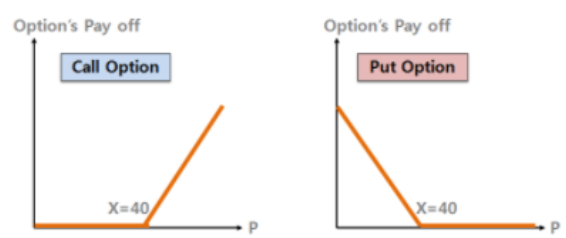

### 블랙 숄즈 방정식 (Black-Scholes model)

##### 금융에서 가장 유명한 방정식 중 하나인 블랙 숄즈 방정식
##### 옵션의 이론적 가격을 계산하는데 사용되는 모델. 
##### 모델의 입력값 : 현재 주가, 옵션 행사가격, 기대 금리, 만기 및 변동성(기초자산 가격 변동의 측정치)

### 콜옵션(Call Option) & 풋옵션(Put Option)

The value of a call option for a non-dividend-paying underlying stock in terms of the Black-Scholes parameters is: \\
\
\begin{align}
C(S_{t},t) = N(d_{1})S_{t} - N(d_{2})Ke^{-r(T-t)}
\end{align}

\\
$\hspace{95mm} {\small  d_{1} = \dfrac{1}{\sigma \sqrt{T-t}} \Big[ \ln(\dfrac{S_{t}}{K})+(r + \dfrac{\sigma^{2}}{2})(T-t) \Big]} \\
\hspace{95mm} {\small d_{2} = d_{1} - \sigma \sqrt{T-t}}$ \\


\\


The price of a corresponding put option based on put-call parity with discount factor $e^{-r(T-t)}$ is: \\
\
\begin{align}
P(S_{t},t) = Ke^{-r(T-t)} - S_{t} + C(S_{t},t)
\end{align} \\
$\hspace{113mm} = N(-d_{2})Ke^{-r(T-t)} - N(-d_{1})S_{t}$


# 파이썬 코드 : Q - Learning Black Scholes (QLBS)

In [ ]:
# 필요한 패키지 설치하기
!pip install bspline

     |████████████████████████████████| 92kB 2.8MB/s 
  Created wheel for bspline: filename=bspline-0.1.1-cp37-none-any.whl size=84471 sha256=97e43c5e3d34e72a1d7b3f958ce283253352fee0f68ae7403c1079fb8c88dbce
  Stored in directory: /root/.cache/pip/wheels/b6/c9/60/0a8a60ad1baaaa166f0c16b9812badf8945278f390767ce1d4
Successfully built bspline


In [ ]:
# 필요한 패키지 불러오기
import numpy as np
import pandas as pd
from scipy.stats import norm
import random
import time
import matplotlib.pyplot as plt
import sys

import bspline
import bspline.splinelab as splinelab

In [ ]:
# 기초 변수
S0 = 100      # initial stock price
mu = 0.05     # drift
sigma = 0.15  # volatility
r = 0.03      # risk-free rate
M = 1         # maturity
T = 24        # number of time steps
N_MC = 10000  # number of paths
delta_t = M / T                # time interval
gamma = np.exp(- r * delta_t)  # discount factor

In [ ]:
np.random.seed(42)
# 주가 트리 데이터프레임
S = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
S.loc[:,0] = S0

# 가우시안 표준 정규 분포에서 난수 matrix array 생성
RN = pd.DataFrame(np.random.randn(N_MC,T), index=range(1, N_MC+1), columns=range(1, T+1))

# 주가 트리 산출
for t in range(1, T+1):
    S.loc[:,t] = S.loc[:,t-1] * np.exp((mu - 1/2 * sigma**2) * delta_t + sigma * np.sqrt(delta_t) * RN.loc[:,t])


delta_S = S.loc[:,1:T].values - np.exp(r * delta_t) * S.loc[:,0:T-1]
delta_S_hat = delta_S.apply(lambda x: x - np.mean(x), axis=0)
# state variable
X = - (mu - 1/2 * sigma**2) * np.arange(T+1) * delta_t + np.log(S)  

In [ ]:
np.arange(T+1) * delta_t

array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
       0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
       0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
       0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
       0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ])

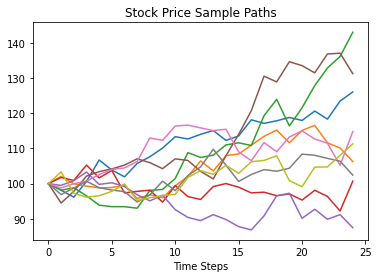

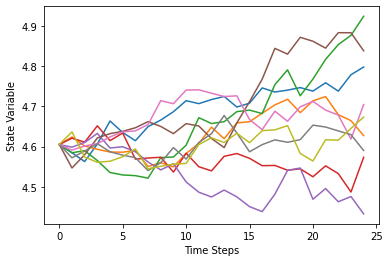

In [ ]:
step_size = N_MC // 10
idx_plot  = np.arange(step_size, N_MC, step_size)

plt.plot(S.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Stock Price Sample Paths')
plt.show()

plt.plot(X.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.ylabel('State Variable')
plt.show()

## Terminal Payoff

### The terminal payoff is the dollar amount an investor receives at expiration from following the option strategy. We’ll define a function to compute the terminal payoff of an European put option.

In [ ]:
## 풋옵션 payoff
def terminal_payoff(ST, K):  # ST : final stock price  , # K : strike
    payoff = max(K - ST, 0)
    return payoff

## Spline Basis Functions

### A spline function is a function that is constructed piece-wise from polynomial functions. The B-spline function is the maximally differentiable interpolative basis function, which we can use for the state variable X.

X.shape =  (10000, 25)
X_min, X_max =  4.024923524903037 5.190802775129617
Number of points k =  17


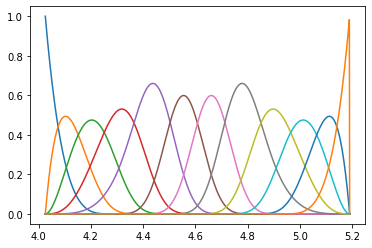

In [ ]:
X_min = np.min(np.min(X))
X_max = np.max(np.max(X))
print('X.shape = ', X.shape)
print('X_min, X_max = ', X_min, X_max)
p = 4            # order of spline (as-is; 3 = cubic, 4: B spline?)
ncolloc = 12
tau = np.linspace(X_min,X_max,ncolloc)  
# These are the sites to which we would like to interpolate
# k is a knot vector that adds endpoints repeats as appropriate for a spline of order p
# To get meaninful results, one should have ncolloc >= p+1
k = splinelab.aptknt(tau, p) 
                             
# Spline basis of order p on knots k
basis = bspline.Bspline(k, p)        
        
f = plt.figure()
# B   = bspline.Bspline(k, p)     # Spline basis functions 
print('Number of points k = ', len(k))
basis.plot()

## Data Matrices

### Now we make data matrices with feature values; the features here are the values of basis functions at data points and the outputs are 3D arrays with dimensions num_tSteps x num_MC x num_basis.

In [ ]:
num_t_steps = T + 1
num_basis =  ncolloc # len(k)
data_mat_t = np.zeros((num_t_steps, N_MC,num_basis ))
print('num_basis = ', num_basis)
print('dim data_mat_t = ', data_mat_t.shape)
# fill it 
for i in np.arange(num_t_steps):
    x = X.values[:,i]
    data_mat_t[i,:,:] = np.array([ basis(el) for el in x ])

num_basis =  12
dim data_mat_t =  (25, 10000, 12)


##Dynamic Programming solution for QLBS

###Quickly explained, a Markov Decision Process (MDP) contains a set of possible world states S, a set of possible actions A, A real valued reward function R(s,a), and a description T of each action’s effects in each state. The Bellman optimality equation can provide an optimal policy to solve every MDP.

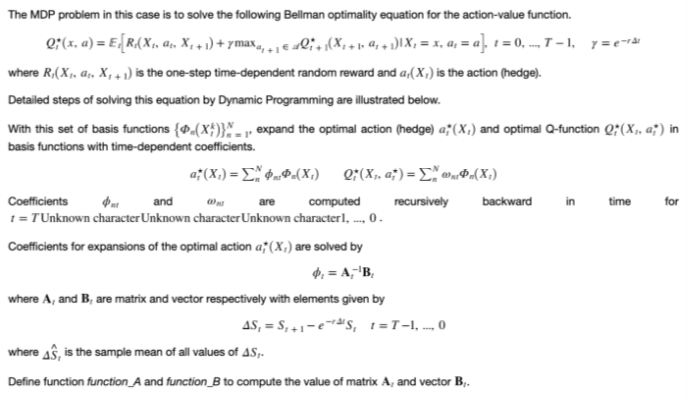

### Define the option strike and risk aversion parameter

In [ ]:
risk_lambda = 0.001 # risk aversion
K = 100             # option stike

### Calculate coefficients of the optimal action

In [ ]:
# functions to compute optimal hedges
def function_A_vec(t, delta_S_hat, data_mat, reg_param):
    X_mat = data_mat[t, :, :]
    num_basis_funcs = X_mat.shape[1]
    this_dS = delta_S_hat.loc[:, t]
    hat_dS2 = (this_dS ** 2).values.reshape(-1, 1)
    A_mat = np.dot(X_mat.T, X_mat * hat_dS2) + reg_param * np.eye(num_basis_funcs)
    return A_mat
   
        
def function_B_vec(t, Pi_hat, delta_S_hat=delta_S_hat, S=S, data_mat=data_mat_t, gamma=gamma, risk_lambda=risk_lambda):
    tmp = Pi_hat.loc[:,t+1] * delta_S_hat.loc[:, t]
    X_mat = data_mat[t, :, :]  # matrix of dimension N_MC x num_basis
    B_vec = np.dot(X_mat.T, tmp)
    return B_vec

### Compute optimal hedge and portfolio value


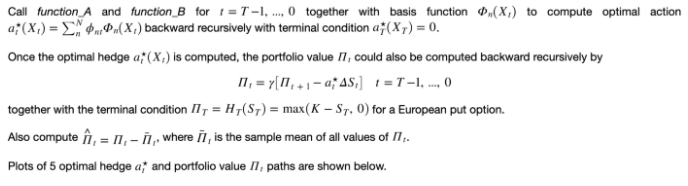

In [ ]:
# portfolio value
Pi = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi.iloc[:,-1] = S.iloc[:,-1].apply(lambda x: terminal_payoff(x, K))
Pi_hat = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Pi_hat.iloc[:,-1] = Pi.iloc[:,-1] - np.mean(Pi.iloc[:,-1])
# optimal hedge
a = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
a.iloc[:,-1] = 0
reg_param = 1e-3 # free parameter
for t in range(T-1, -1, -1):
    A_mat = function_A_vec(t, delta_S_hat, data_mat_t, reg_param)
    B_vec = function_B_vec(t, Pi_hat, delta_S_hat, S, data_mat_t, gamma, risk_lambda)
    # print ('t =  A_mat.shape = B_vec.shape = ', t, A_mat.shape, B_vec.shape)
    
    # coefficients for expansions of the optimal action
    phi = np.dot(np.linalg.inv(A_mat), B_vec)
    
    a.loc[:,t] = np.dot(data_mat_t[t,:,:],phi)
    Pi.loc[:,t] = gamma * (Pi.loc[:,t+1] - a.loc[:,t] * delta_S.loc[:,t])
    Pi_hat.loc[:,t] = Pi.loc[:,t] - np.mean(Pi.loc[:,t])
    
a = a.astype('float')
Pi = Pi.astype('float')
Pi_hat = Pi_hat.astype('float')

### Compute rewards for all paths

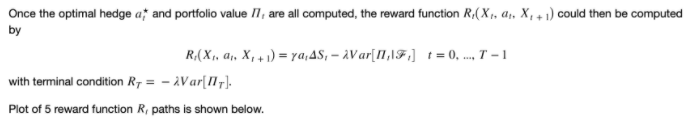

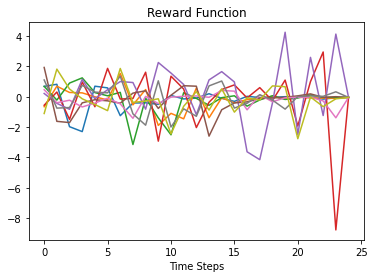

In [ ]:
# reward function
R = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
R.iloc[:,-1] = - risk_lambda * np.var(Pi.iloc[:,-1])
for t in range(T):
    R.loc[1:,t] = gamma * a.loc[1:,t] * delta_S.loc[1:,t] - risk_lambda * np.var(Pi.loc[1:,t])
  
# plot 10 paths
plt.plot(R.T.iloc[:,idx_plot]) #plt.plot(R.T.iloc[:, idx_plot])
plt.xlabel('Time Steps')
plt.title('Reward Function')
plt.show()

### Compute the optimal Q-function


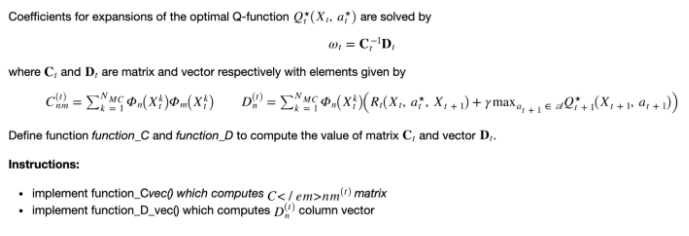

In [ ]:
def function_C_vec(t, data_mat, reg_param):
    X_mat = data_mat[t, :, :]
    num_basis_funcs = X_mat.shape[1]
    C_mat = np.dot(X_mat.T, X_mat) + reg_param * np.eye(num_basis_funcs)
    return C_mat
   
def function_D_vec(t, Q, R, data_mat, gamma=gamma):
    X_mat = data_mat[t, :, :]
    D_vec = np.dot(X_mat.T, R.loc[:,t] + gamma * Q.loc[:, t+1])
    return D_vec

### Now we can call the functions to get the optimal Q function


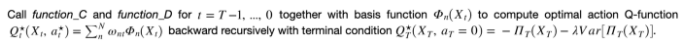

In [ ]:
# Q function
Q = pd.DataFrame([], index=range(1, N_MC+1), columns=range(T+1))
Q.iloc[:,-1] = - Pi.iloc[:,-1] - risk_lambda * np.var(Pi.iloc[:,-1])
reg_param = 1e-3
for t in range(T-1, -1, -1):
    C_mat = function_C_vec(t,data_mat_t,reg_param)
    D_vec = function_D_vec(t, Q,R,data_mat_t,gamma)
    omega = np.dot(np.linalg.inv(C_mat), D_vec)
    
    Q.loc[:,t] = np.dot(data_mat_t[t,:,:], omega)

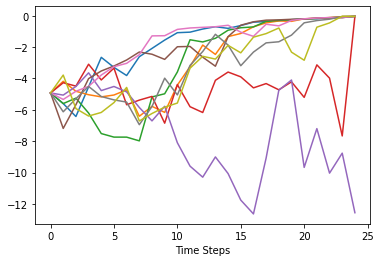

In [ ]:
# plot 10 paths
plt.plot(Q.T.iloc[:,idx_plot]) 
plt.xlabel('Time Steps')
plt.title('Optimal Q-Function')
plt.show()

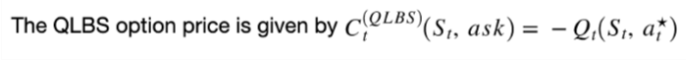

## Comparison

### Let’s compare the QLBS price to the European put price given by the Black-Scholes formula.

In [ ]:
# The Black-Scholes prices
def bs_put(t, S0=S0, K=K, r=r, sigma=sigma, T=M):
    d1 = (np.log(S0/K) + (r + 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    d2 = (np.log(S0/K) + (r - 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    price = K * np.exp(-r * (T-t)) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    return price
def bs_call(t, S0=S0, K=K, r=r, sigma=sigma, T=M):
    d1 = (np.log(S0/K) + (r + 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    d2 = (np.log(S0/K) + (r - 1/2 * sigma**2) * (T-t)) / sigma / np.sqrt(T-t)
    price = S0 * norm.cdf(d1) - K * np.exp(-r * (T-t)) * norm.cdf(d2)
    return price

In [ ]:
print("-"*40)
print("    QLBS Option Pricing (DP solution)")
print("-"*40)
print()
print("Initial Stock Price:      ", S0)
print("Drift of Stock:           ", mu)
print("Volatility of Stock:      ", sigma)
print("Risk-free Rate:           ", r)
print("Risk aversion parameter:  ", risk_lambda)
print("Strike:                   ", K)
print("Maturity:                 ", M)
print()
print("QLBS Put Price:           ", np.mean(-Q.T.iloc[0,:]))
print()
print("Black-Scholes Put Price:  ", bs_put(t=0))

----------------------------------------
    QLBS Option Pricing (DP solution)
----------------------------------------

Initial Stock Price:       100
Drift of Stock:            0.05
Volatility of Stock:       0.15
Risk-free Rate:            0.03
Risk aversion parameter:   0.001
Strike:                    100
Maturity:                  1

QLBS Put Price:            4.926125422862273

Black-Scholes Put Price:   4.529640948763429


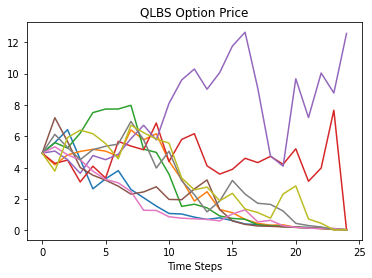

In [ ]:
# plot 10 paths
plt.plot(-Q.T.iloc[:,idx_plot]) 
plt.xlabel('Time Steps')
plt.title('QLBS Option Price')
plt.show()

# Summary

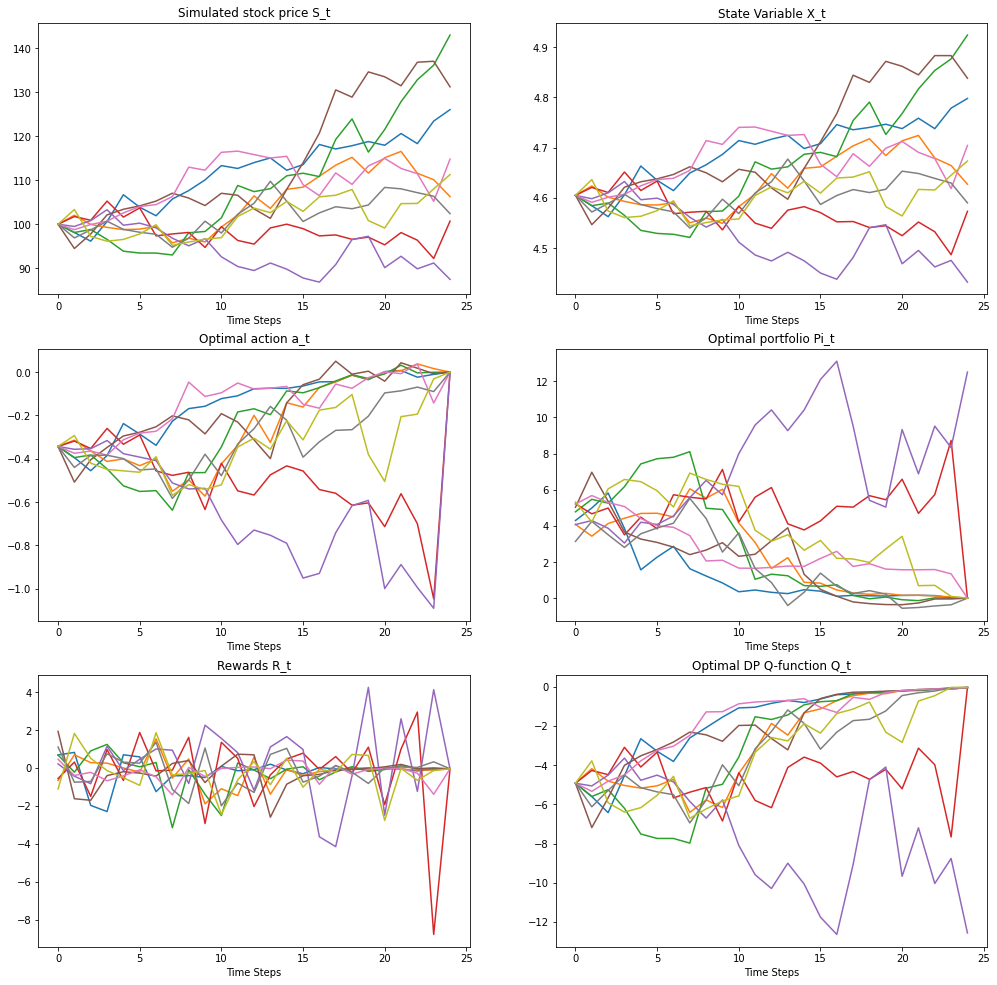

In [ ]:
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
plt.plot(S.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Simulated stock price S_t')
#plt.show()

plt.subplot(3,2,2)
plt.plot(X.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('State Variable X_t')
#plt.show()

plt.subplot(3,2,3)
plt.plot(a.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Optimal action a_t')
#plt.show()

plt.subplot(3,2,4)
plt.plot(Pi.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Optimal portfolio Pi_t')
#plt.show()

plt.subplot(3,2,5)
plt.plot(R.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Rewards R_t')
#plt.show()

plt.subplot(3,2,6)
plt.plot(Q.T.iloc[:,idx_plot])
plt.xlabel('Time Steps')
plt.title('Optimal DP Q-function Q_t')
plt.show()